<h4>Google Play store Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apps=pd.read_csv('apps.csv')
apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
reviews=pd.read_csv('user_reviews.csv')
reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
# Drop unnecessary unnamed columns
apps = apps.drop(columns=[col for col in apps.columns if 'Unnamed' in col], errors='ignore')



In [6]:
# Clean 'Installs' column: remove '+' and ',' and convert to integer
apps['Installs'] = apps['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype('int64')



In [7]:
# Convert 'Size' to MB
def convert_size(value):
    if pd.isna(value):
        return pd.NA
    if isinstance(value, (int, float)):
        return float(value)
    value = value.strip()
    if value == 'Varies with device':
        return pd.NA
    if value.endswith('M'):
        return float(value[:-1])
    if value.endswith('k'):
        return float(value[:-1]) / 1024
    return pd.NA

apps['Size_MB'] = apps['Size'].apply(convert_size)



In [8]:
# Clean 'Price' column
apps['Price_USD'] = apps['Price'].astype(str).str.replace('$', '', regex=False).astype('float64')



In [9]:
# Convert 'Reviews' and 'Rating' to numeric
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')




In [10]:
# Category Exploration
top_categories = apps['Category'].value_counts().head(15)



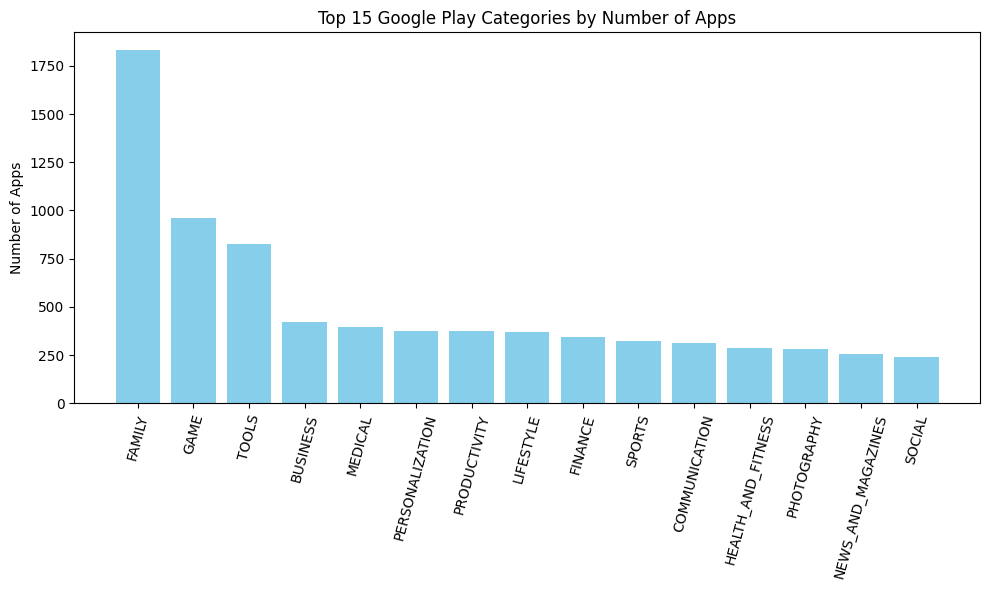

In [ ]:
# Plot Top Categories
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values, color='skyblue')
plt.xticks(rotation=75)
plt.title('Top 15 Google Play Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()

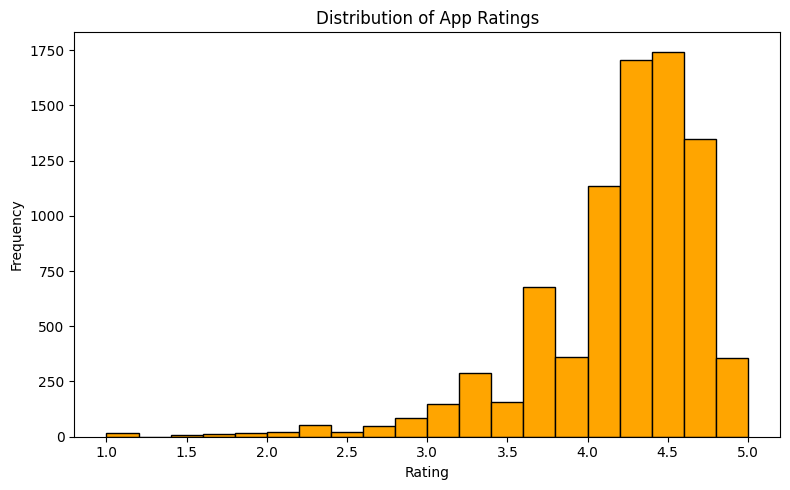

In [ ]:

# Histogram of App Ratings
plt.figure(figsize=(8, 5))
plt.hist(apps['Rating'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

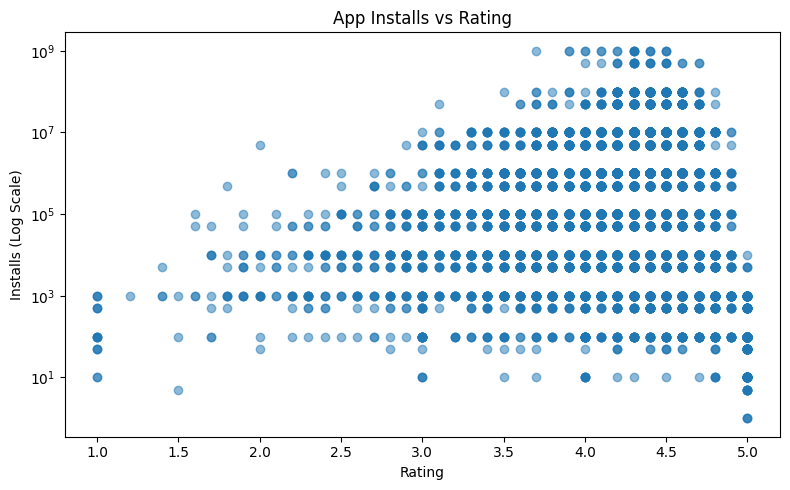

In [ ]:
# Scatter Plot: Installs vs Rating
plt.figure(figsize=(8, 5))
plt.scatter(apps['Rating'], apps['Installs'], alpha=0.5)
plt.yscale('log')
plt.title('App Installs vs Rating')
plt.xlabel('Rating')
plt.ylabel('Installs (Log Scale)')
plt.tight_layout()
plt.show()

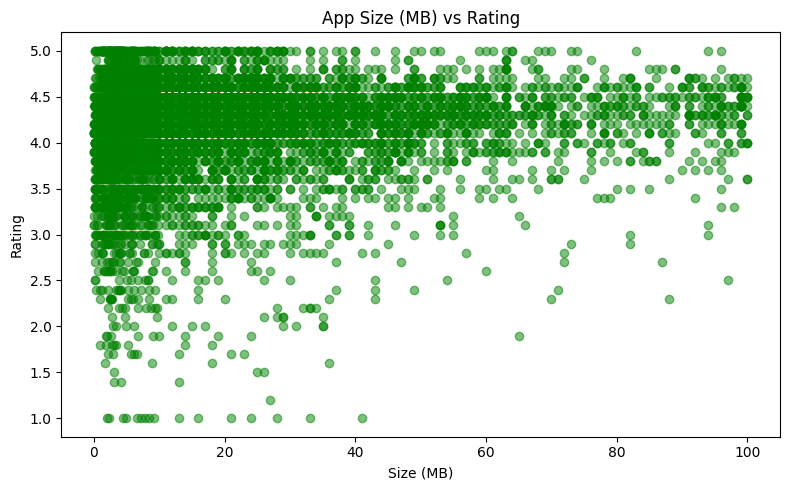

In [ ]:
# Scatter Plot: Size vs Rating
size_rating = apps[['Size_MB', 'Rating']].dropna()
plt.figure(figsize=(8, 5))
plt.scatter(size_rating['Size_MB'], size_rating['Rating'], alpha=0.5, color='green')
plt.title('App Size (MB) vs Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


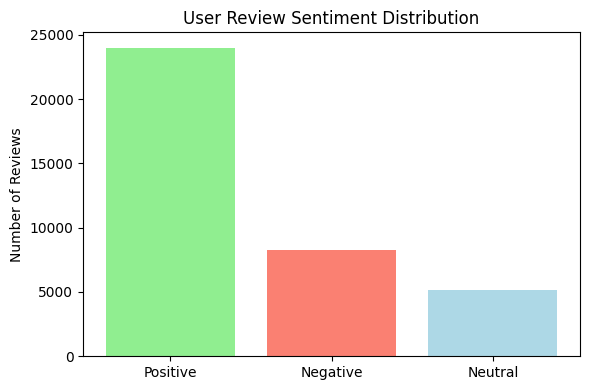

In [15]:
sentiment_counts = reviews['Sentiment'].dropna().value_counts()

# Plot Sentiment Distribution
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['lightgreen', 'salmon', 'lightblue'])
plt.title('User Review Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()
